<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability
When solving a differential equation numerically we need to take note of two things when considering a scheme, accuracy and stability. Here **accuracy** of a scheme is simply how close the numerical approximation is to the exact solution while **stability** is the ability to keep a solution's error from getting out of control as we take more steps forward in our scheme. These factors will determine what scheme and stepsize $h$ we choose. Here we'll use the previous methods to solve 
$$\ddot\Theta(t) = -9.8\Theta(t),\ \Theta(0) = 1 \dot\Theta(0) = 0$$ 

<ipython-input-10-a09f2223f0db>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


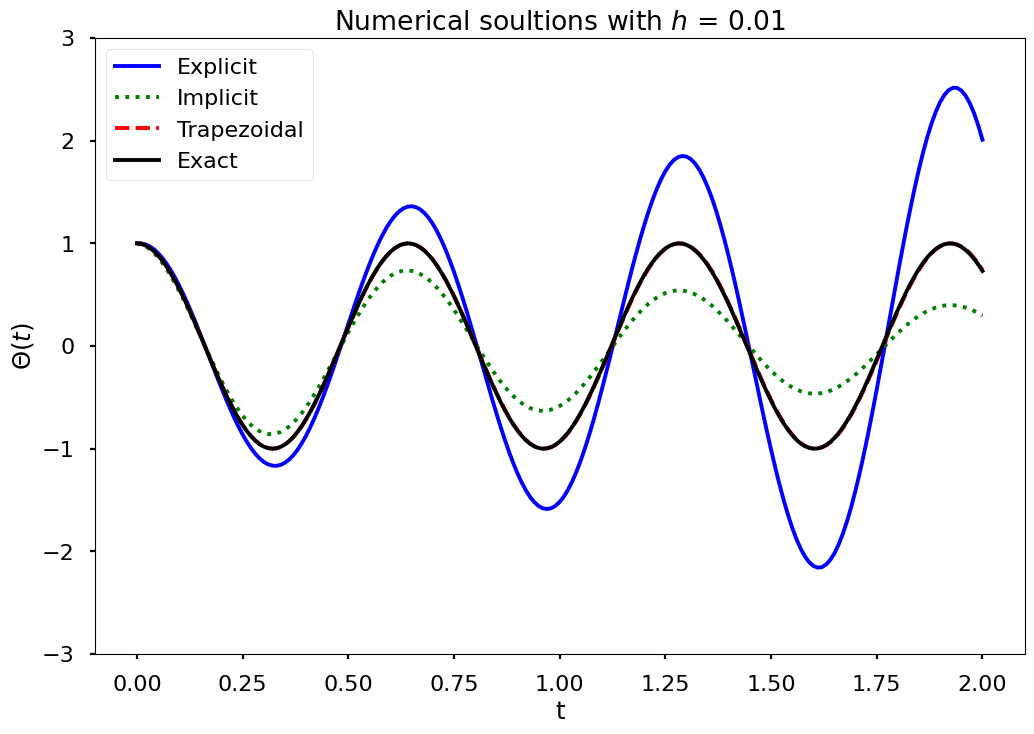

In [10]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.01
# define numerical grid
t = np.arange(0, 2+h, h)
# oscillation freq. of pendulum
w = 9.8
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.title(r"Numerical soultions with $h$ = 0.01")
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

Here we can see that the E.E. method is unsatable and that the I.E. method is inaccurate. However we see that the C.N. method is both stable and accurate. However if we adjust our $h$ we'll see that the C.N. method has a phase shift associated to it 

<ipython-input-11-b45acf4ab954>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


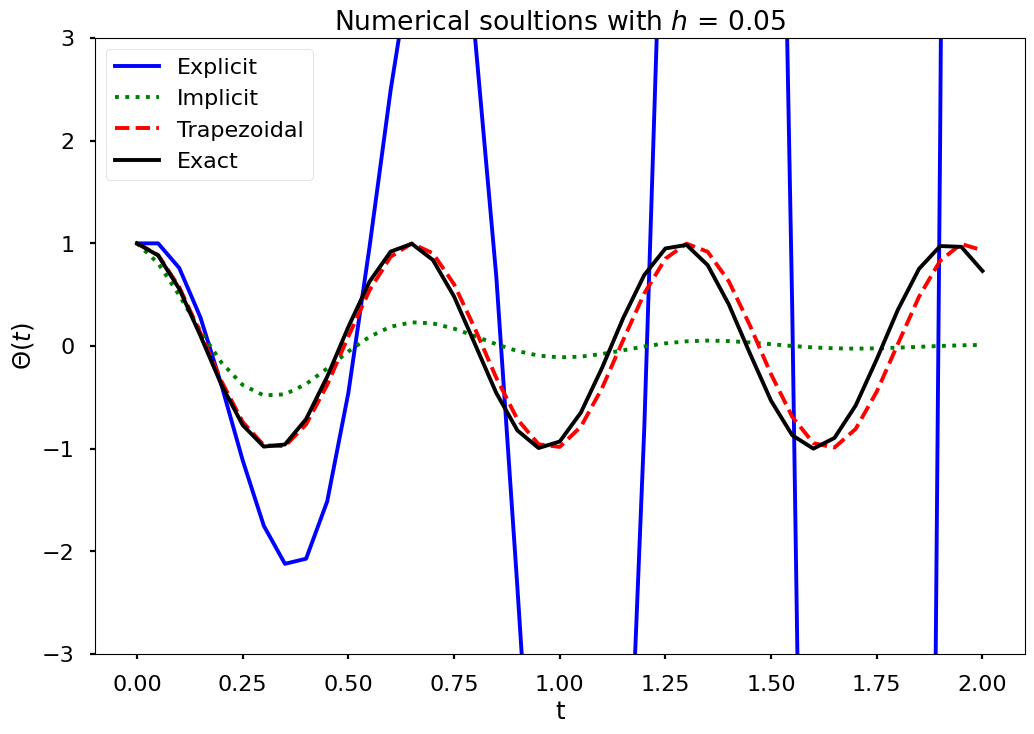

In [11]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 2+h, h)
# oscillation freq. of pendulum
w = 9.8
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.title(rf"Numerical soultions with $h$ = {h}")
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods
## 22.5.1 Predictor-Corrector
Here we'll try another method called the predictor-corrector method. This method does what it says on the tin, first we'll take an explicit step to predict the next step and then take second substep to correct our prediction. For instance the mid-point predictor-corrector method for the diff eq
$$\frac{dS(t)}{dt} = F(t,S(t)),$$
we'll get the following 
$$\text{Predictor: } S\left(t_i+\frac{h}{2}\right) = S(t_i) +\frac{h}{2}F(t_i, S(t_i))$$
$$\text{Corrector: } S\left(t_{i+1}\right) = S(t_i) +\frac{h}{2}F\left(t_i+\frac{h}{2}, S\left(t_i+\frac{h}{2}\right)\right)$$

## 22.5.2 Runge Kutta Methods
Here we can use the Runge Kutta (RK) methods which are also accurate/stable methods. Here the RK methods are named after their order of accuracy (i.e. RK2 is 2nd order accurate, RK4 is 4th order accurate, etc) and are similar to the E.E. method except we keep track of more terms in the Taylor expansion. Let's look at the RK2 and the RK4 methods to solve $\frac{dS(t)}{dt} = F(t, S(t))$

**RK2 Method**

$$k_1 = F(t_i,S(t_i))$$
$$k_2 = F(t_i+h,S(t_i)+hk_1)$$
$$\implies S(t_{i+1}) = S(t_i)+\frac{h}{2}\left(k_1+k_2\right)$$

**RK4 Method**
$$k_1 = F(t_i,S(t_i))$$
$$k_2 = F\left(t_i + \frac{h}{2}, S(t_i) + \frac{h}{2}k_1\right)$$
$$k_3 = F\left(t_i + \frac{h}{2}, S(t_i) + \frac{h}{2}k_2\right)$$
$$k_4 = F\left(t_i + h, S(t_i) + hk_3\right)$$
$$\implies S(t_{i+1}) = S(t_i)+\frac{h}{6}\left(k_1+2k_2+2k_3+k_4\right)$$

# 22.6 Python ODE Solvers
Here we can use the the scipy library to solve differential equations in the form of 
$$\frac{dS}{dt} = F(t,S(t)), \ S(t_0) = S_0$$
using ` solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)`
Let's try it on the function
$$\frac{dS}{dt} = -\sin(t), \ S(0) = 1$$

<ipython-input-13-de8f1849ca0e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


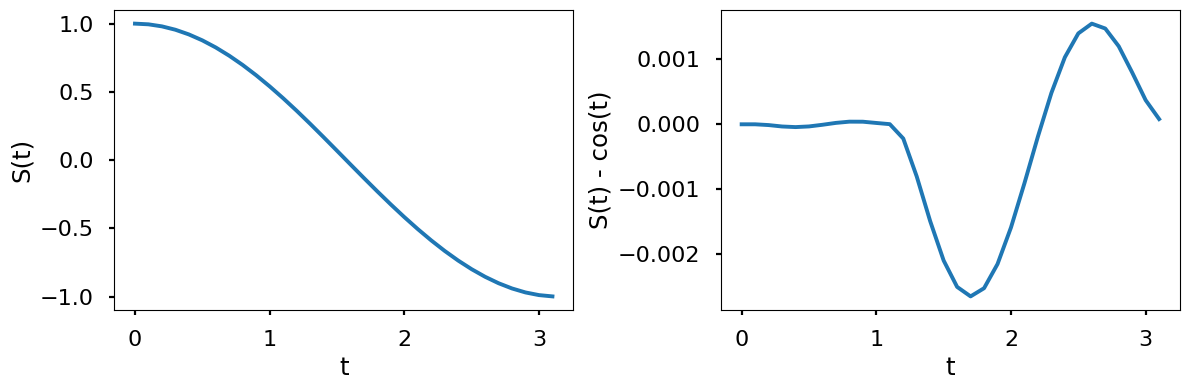

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: -np.sin(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - cos(t)')
plt.tight_layout()
plt.show()